# Question 1 <div style="text-align: right"> [10 pts] </div>

### 1. Import Libraries (keep them here for clarity) <div style="text-align: right"> [0.25 pts] </div>

In [ ]:
# points will be granted for all the imports to be kept here, untill and unless justification is provided.
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder




### 2. Load the dataset <div style="text-align: right"> [0.5 pts] </div>

#### Use : 'boston housing' dataset from sklearn

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

target = raw_df.values[1::2, 2]

print(data.data.shape)

attributes = ["CRIM","ZN","INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD" , "TAX", "PTRATIO" ,"B", "LSTAT"]#, "MEDV"]

df = pd.DataFrame(data, columns=attributes)

df['PRICE'] = target

(506, 13)


In [ ]:
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


### 3.  Seggregate data in variables <div style="text-align: right"> [0.25 pts] </div>

In [ ]:
X = df.drop(columns=['PRICE'])  # All columns except 'PRICE' as feature variables
y = df['PRICE']  # 'PRICE' column as the target variable

# Display X and y
print("Feature Variables (X):")
print(X)

print("\nTarget Variable (y):")
print(y)

Feature Variables (X):
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  39

### 4.  Convert in Pandas Dataframe and show as below <div style="text-align: right"> [0.25 pts] </div>

In [ ]:
# Convert X into a pandas DataFrame
X_df = pd.DataFrame(X)

X_df.head(506)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### 5.  Split the dataset into training and testing sets <div style="text-align: right"> [0.5 pts] </div>

#### Note : test size --> 20% and random state ---> 111

In [ ]:

# Split the dataset into training (80%) and testing (20%) sets with random state 111
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


### 6. Explain the differences between Linear /  Ridge regression <div style="text-align: right"> [1 pts] </div>

#### 6.1. Magnitude of Coefficients:

Linear Regression:

Finding the best-fitting line to forecast the output variable in relation to the input variables or features is the main goal of the linear regression model.In the event that there are no limitations on the size of the coefficients, or so-called values, that make up the features product. In the event that there were to be outliers in the data, the resulting coefficients would be rather big.
For instance, let's say that we are estimating property pricing based on square footage and bedrooms. If the outlier in a linear regression model is a lavish mansion, it can affect the coefficients and cause them to be unusually big.

Ridge Regression: This model is another version of linear regression, but it also includes a regularization term. Simply said, a regularization term is an additional mathematical term in the formula that updates the coefficents to be minimal. Ridge regression use this term to stabilize the coefficients despite the presence of outliers in the data.
Using the same example, ridge regression would likely include size restrictions on the coefficients for the bedroom and square foot, preventing them from being significantly influenced by the size of the mansion.

In short, there is no additional term in a linear regression to restrict the amount of the coefficient, in contrast to the ridge regression.



In [ ]:

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_coeff_magnitudes = linear_reg.coef_

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_reg.fit(X_train, y_train)
ridge_coeff_magnitudes = ridge_reg.coef_

print("Linear Regression Coefficient Magnitudes:", linear_coeff_magnitudes)
print("Ridge Regression Coefficient Magnitudes:", ridge_coeff_magnitudes)


Linear Regression Coefficient Magnitudes: [-7.48337753e-02  5.14752164e-02  3.97589082e-02  2.45234005e+00
 -1.63149112e+01  3.80836814e+00 -8.76931962e-03 -1.43470363e+00
  2.74837393e-01 -1.20744867e-02 -9.10116591e-01  1.08478530e-02
 -5.14496805e-01]
Ridge Regression Coefficient Magnitudes: [-6.96475710e-02  5.09485446e-02  7.80368725e-03  2.31848480e+00
 -8.79930657e+00  3.84944441e+00 -1.52089993e-02 -1.31130539e+00
  2.53330601e-01 -1.24731461e-02 -8.38018136e-01  1.13927057e-02
 -5.23297278e-01]


#### 6.2. Fitting (Over/Under):

Linear Regression Overfitting and Underfitting:

The linear regression Underfitting and Overfitting: Overfitting in linear regression happens when the model grows overly complicated, capturing noise and random oscillations in the training data, leading to poor generalization to new data. Under fitting, on the other hand, occurs when the model is extremely simplistic and fails to identify the underlying patterns in the data, producing subpar performance on both the training and test data.


Ridge Regression Overfitting and Underfitting:

Due to its regularization term, Ridge Regression is less prone to overfitting than Linear Regression. By limiting the model's coefficients from growing out of control, this term lowers the likelihood that the data will be fitted with noise. Ridge Regression is less prone to overfitting because it provides a better balance between bias and variance. Ridge Regression still has the potential for underfitting, but it typically happens when the model is overly simple and is unable to capture key correlations in the data, resulting in subpar performance on both training and test datasets.

In [ ]:
# Linear Regression
linear_train_predictions = linear_reg.predict(X_train)
linear_test_predictions = linear_reg.predict(X_test)

linear_train_mse = mean_squared_error(y_train, linear_train_predictions)
linear_test_mse = mean_squared_error(y_test, linear_test_predictions)

# Ridge Regression
ridge_train_predictions = ridge_reg.predict(X_train)
ridge_test_predictions = ridge_reg.predict(X_test)

ridge_train_mse = mean_squared_error(y_train, ridge_train_predictions)
ridge_test_mse = mean_squared_error(y_test, ridge_test_predictions)

print("Linear Regression Training MSE:", linear_train_mse)
print("Linear Regression Testing MSE:", linear_test_mse)
print("Ridge Regression Training MSE:", ridge_train_mse)
print("Ridge Regression Testing MSE:", ridge_test_mse)

Linear Regression Training MSE: 21.761080534382224
Linear Regression Testing MSE: 23.0664284240685
Ridge Regression Training MSE: 21.925704132873843
Ridge Regression Testing MSE: 23.637370717089674


#### 6.3. Feature Importance:

Linear Regression:

All features are given equal weight in linear regression, which seeks to identify coefficients for each feature to reduce the discrepancy between expected and observed values. It doesn't automatically offer a way to gauge feature significance. Data scientists must look at the coefficients, where larger values denote greater relevance, to determine the significance of a feature. However, if the features have various scales, this may be a problem.

Ridge regression:

Ridge regression, like linear regression, uses all predictor variables. However, it adds a regularization term to the coefficient estimation. This regularization encourages smaller coefficients and penalizes larger ones, reducing the individual impact of each feature on predictions. It doesn't perform traditional feature selection by setting coefficients to zero but effectively decreases the importance of less relevant features. Ridge regression balances and reduces the effects of features that might have a high impact in linear regression, making the model more robust and less sensitive to individual feature influence.

In [ ]:
# Create and fit a Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_reg.fit(X, y)

# Ridge Regression Coefficients
ridge_coefficients = ridge_reg.coef_

# Create a DataFrame to display feature names and coefficients
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_coefficients})

# Sort the DataFrame by the absolute coefficient values in descending order
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print the sorted feature importance DataFrame
print("Feature Importance (Ridge Regression Coefficients):")
print(feature_importance_df)


Feature Importance (Ridge Regression Coefficients):
    Feature  Coefficient
4       NOX   -10.777015
5        RM     3.854000
3      CHAS     2.552393
7       DIS    -1.372654
10  PTRATIO    -0.876074
12    LSTAT    -0.533343
8       RAD     0.290142
0      CRIM    -0.104595
1        ZN     0.047443
9       TAX    -0.012912
11        B     0.009673
2     INDUS    -0.008805
6       AGE    -0.005415


#### 6.4. Model Complexity:

Linear Regression:
The complexity of a linear regression depends on the amount of features and the relationships among them. It looks for the best possible linear relationship between the features and the target variable. Complex models with multiple features or intricate interactions can often lead to overfitting the data by fitting noise. This flexibility can capture both basic and complex relationships.

Ridge regression:
Ridge regression, a variant of linear regression, simplifies models by introducing an L2 regularization term. Model complexity is controlled via a hyperparameter called alpha, which balances data fitting with coefficient size. Higher alpha values lead to simpler models with smaller coefficients, while lower alpha values allow a bit more complexity.


In [ ]:
alphas = [0.01, 0.1, 1, 10, 100]  # You can adjust the list of alpha values

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    ridge_test_predictions = ridge_reg.predict(X_test)
    ridge_test_mse = mean_squared_error(y_test, ridge_test_predictions)

    print(f"Alpha={alpha}, Ridge Regression Testing MSE: {ridge_test_mse}")


Alpha=0.01, Ridge Regression Testing MSE: 23.072985986269526
Alpha=0.1, Ridge Regression Testing MSE: 23.13298652113311
Alpha=1, Ridge Regression Testing MSE: 23.637370717089674
Alpha=10, Ridge Regression Testing MSE: 24.675695506223747
Alpha=100, Ridge Regression Testing MSE: 26.517966980783722


### 7. Implement Linear Regression - sklearn <div style="text-align: right"> [1 pts] </div>

In [ ]:
# Create a Linear Regression model
linear_reg = LinearRegression()
# Fit the model on the training data
linear_reg.fit(X_train, y_train)

LinearRegression()

### 8. Implement Ridge Regression with lambda = 1.0 - sklearn <div style="text-align: right"> [1 pts] </div>

In [ ]:
# Create a Ridge Regression model with lambda (alpha) = 1.0
ridge_reg = Ridge(alpha=1.0)
# Fit the model on the training data
ridge_reg.fit(X_train, y_train)

Ridge()

### 9. Evaluate the models (M.S.E) <div style="text-align: right"> [0.5 pts] </div>

In [ ]:
# Linear Regression
linear_test_predictions = linear_reg.predict(X_test)

linear_test_mse = mean_squared_error(y_test, linear_test_predictions)

# Ridge Regression
ridge_test_predictions = ridge_reg.predict(X_test)

ridge_test_mse = mean_squared_error(y_test, ridge_test_predictions)

print("Linear Regression Mean Squared Erro:", linear_test_mse)
print("Ridge Regression Mean Squared Error:", ridge_test_mse)

Linear Regression Mean Squared Erro: 23.0664284240685
Ridge Regression Mean Squared Error: 23.637370717089674


### 10. Plot the coefficients of Linear and Ridge Regression models <div style="text-align: right"> [0.5 pts] </div>

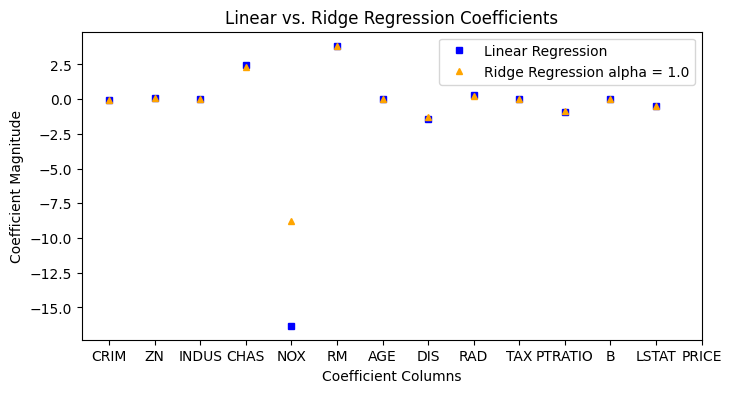

In [ ]:
# Get the coefficients of both models
linear_coeffs = linear_reg.coef_
ridge_coeffs = ridge_reg.coef_

# Assuming your data is in a DataFrame named df, you can access column names as follows
column_names = df.columns.tolist()

plt.figure(figsize=(8, 4))
plt.plot(linear_coeffs, 's', markersize=5, color='blue', label="Linear Regression")
plt.plot(ridge_coeffs, '^', markersize=5, color='orange', label="Ridge Regression alpha = 1.0")
plt.xticks(np.arange(len(column_names)), column_names, rotation=0)
plt.title("Linear vs. Ridge Regression Coefficients") # Set column names as x-axis ticks
plt.xlabel("Coefficient Columns")
plt.ylabel("Coefficient Magnitude")
plt.legend()
plt.show()

------------

### 11. What are the 'N' most important features in our data according to your graph? <div style="text-align: right"> [0.25 pts] </div>

In [ ]:
# N to the number of top features to consider
N = 6
top_feature_indices = np.argsort(np.abs(linear_coeffs))[::-1][:N]#N features picked based on their difference in coefficients
top_feature_names = df.columns[top_feature_indices]
print(f"The {N} most important features are: {', '.join(top_feature_names)}")

The 6 most important features are: NOX, RM, CHAS, DIS, PTRATIO, LSTAT


In [ ]:
features_df = df[top_feature_names]
features_df.head()

,NOX,RM,CHAS,DIS,PTRATIO,LSTAT
0,0.538,6.575,0.0,4.0900,15.3,4.98
1,0.469,6.421,0.0,4.9671,17.8,9.14
2,0.469,7.185,0.0,4.9671,17.8,4.03
3,0.458,6.998,0.0,6.0622,18.7,2.94
4,0.458,7.147,0.0,6.0622,18.7,5.33


### 12. Remove All other features and keep your selected 'N' features <div style="text-align: right"> [0.25 pts] </div>

In [ ]:
features_df = df[top_feature_names]
features_df.head()

,NOX,RM,CHAS,DIS,PTRATIO,LSTAT
0,0.538,6.575,0.0,4.0900,15.3,4.98
1,0.469,6.421,0.0,4.9671,17.8,9.14
2,0.469,7.185,0.0,4.9671,17.8,4.03
3,0.458,6.998,0.0,6.0622,18.7,2.94
4,0.458,7.147,0.0,6.0622,18.7,5.33


### 13. Re calculate the M.S.E  <div style="text-align: right"> [1.5 pts] </div>

In [ ]:
X = features_df  # Features
y = df['PRICE']  # Replace 'target_column_name' with the actual name of your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)

print("MSE with Linear Regression:", linear_reg_mse)
# Ridge Regression
alpha = 1.0  # You can adjust this value as needed
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_train, y_train)
ridge_reg_predictions = ridge_reg.predict(X_test)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions)

print("MSE with Ridge Regression:", ridge_reg_mse)


MSE with Linear Regression: 24.97251073289079
MSE with Ridge Regression: 24.9068995757542


### 14. Re Plot the coefficients  <div style="text-align: right"> [0.25 pts] </div>

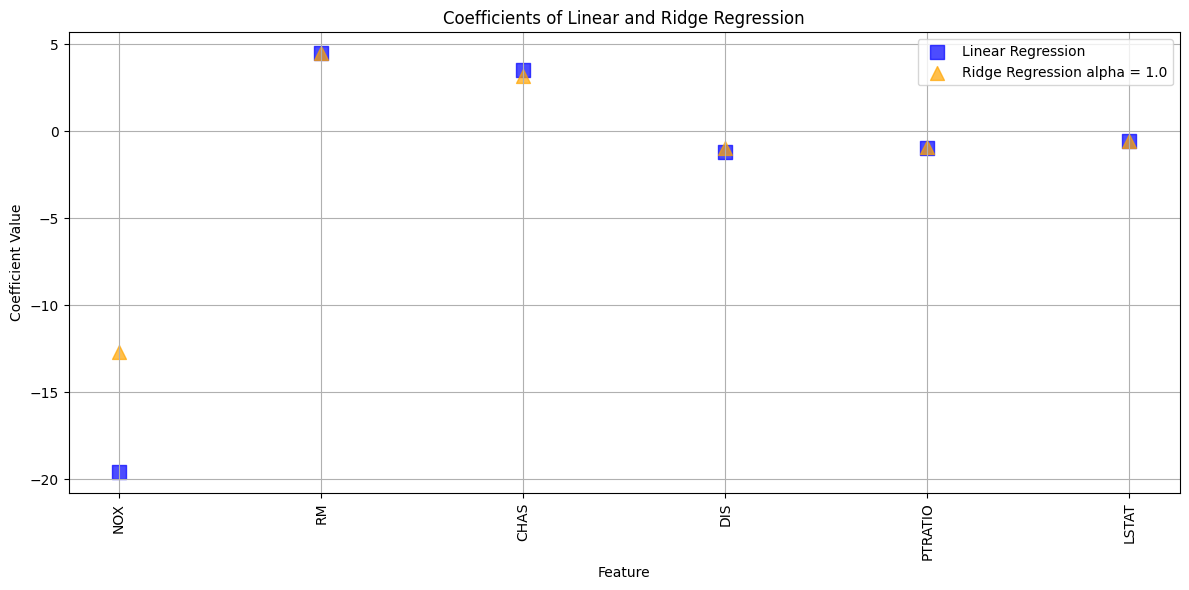

In [ ]:
# Coefficients of Linear Regression
linear_reg_coeffs = linear_reg.coef_

# Coefficients of Ridge Regression
ridge_reg_coeffs = ridge_reg.coef_

# Create a list of feature names to label the coefficients
feature_names = X.columns

# Create a range for the x-axis (features)
x_range = np.arange(len(feature_names))

# Create scatter plot for coefficients
plt.figure(figsize=(12, 6))
plt.scatter(x_range, linear_reg_coeffs, label='Linear Regression', marker='s', s=100, c='blue', alpha=0.7)
plt.scatter(x_range, ridge_reg_coeffs, label='Ridge Regression alpha = 1.0', marker='^', s=100, c='orange', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Linear and Ridge Regression')
plt.xticks(x_range, feature_names, rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 15. Do you think you picked the correct 'N' features? Explain your rationale.! <div style="text-align: right"> [0.5 pts] </div>

These features are considered important because they have the highest absolute coefficients, indicating that they have a significant impact on the predicted "PRICE" in the context of your linear regression model. In your case, you've set N to 8.

The selected features that I chose was NOX, RM, CHAS, DIS, PTRATIO, LSTAT can be interpreted as follows:

It is critical to assess the significance of these features in the context of the regression models you are developing. The regression analysis coefficients and p-values will provide insight into the strength and relevance of these feature associations with the target variable, "PRICE," in the unique dataset you are working with.

### 16. Write About (what are they and what do they impact) <div style="text-align: right"> [0.5 pts] </div>

NOX (Nitrogen Oxides concentration): NOX is something related to the air pollution,this might affect the overall desirability of a neighborhood. Lower the values, changes the prices is what is observed from the dataset.

RM (Average number of rooms per dwelling): There was an increaese in the number of rooms and it has good impact on the price, Based on the higher number of rooms, the price also increases.

CHAS (Charles River dummy variable): A CHAS of 1 indicates proximity to the Charles River, which might boost housing values because waterfront properties are frequently regarded more desirable.

DIS (Weighted distance to employment centers): Shorter distances to areas of work are preferred since they make commuting more convenient. This feature is anticipated to boost property costs.

PTRATIO (Pupil-teacher ratio): Lower pupil-teacher ratios are typically indicative of a better-funded and therefore more appealing school system, which can contribute to higher property costs.

LSTAT (Lower status of the population): Lower home prices can be related with a higher percentage of lower-status population. It could be due to the neighborhood's lower average income and potentially less pleasant living conditions.

#### 16.1. Magnitude of Coefficients

In [ ]:
# Creating a DataFrame to display the coefficients
coeff_df = pd.DataFrame({
    'Feature': top_feature_names,
    'Linear_Coefficients': linear_reg_coeffs,
    'Ridge_Coefficients': ridge_reg_coeffs
})

print(coeff_df)

   Feature  Linear_Coefficients  Ridge_Coefficients
0      NOX           -19.582321          -12.674345
1       RM             4.468614            4.465908
2     CHAS             3.504341            3.152965
3      DIS            -1.193015           -0.957934
4  PTRATIO            -0.961053           -0.932551
5    LSTAT            -0.560380           -0.597673


#### 16.2. Sign of Coefficients

Positive Coefficients: When a coefficient is positive, it means that as the value of the corresponding feature increases, the predicted value of the target variable also increases. In your provided data:

- For the 'RM' feature, both the Linear and Ridge coefficients are positive. This indicates that as the average number of rooms per dwelling (RM) increases, the predicted house price is expected to increase. This makes intuitive sense, as houses with more rooms are often larger and more expensive.

- For the 'CHAS' feature, both coefficients are also positive. This suggests that if a property is located along the Charles River (CHAS), the predicted house price tends to be higher. This could imply that riverfront properties are considered more valuable.

Negative Coefficients: A negative coefficient indicates that as the value of the corresponding feature increases, the predicted value of the target variable decreases. In your data:

- For the 'NOX' feature, both coefficients are negative. This implies that as the nitric oxide concentration (NOX) in the air increases, the predicted house price tends to decrease. High levels of air pollution, as indicated by high NOX values, can negatively impact property values.

- For the 'DIS' feature, both coefficients are negative. This suggests that as the weighted distance to employment centers (DIS) increases, the predicted house price tends to decrease. Properties located closer to employment centers are often more valuable due to their proximity to job opportunities.

- For 'PTRATIO' and 'LSTAT,' both have negative coefficients. This indicates that a higher pupil-teacher ratio (PTRATIO) and a higher percentage of lower-status population (LSTAT) in the neighborhood are associated with lower house prices.

### 17.Why is there any difference between the coefficients of the two (linear/ridge) models (if any)? <div style="text-align: right"> [0.5 pts] </div>

The primary distinction between the coefficients in Linear Regression and Ridge Regression lies in the concept of regularization. Ridge Regression introduces a regularization term (L2 regularization) that is absent in Linear Regression. This term is designed to penalize the magnitude of the coefficients, encouraging them to be smaller.

Ridge Regression is particularly effective when dealing with multicollinearity among features (high correlations), as it helps prevent unstable and large coefficients that can result from Linear Regression's attempt to perfectly fit the training data. The regularization in Ridge Regression aims to strike a balance between bias and variance. It introduces a controlled level of bias by shrinking the coefficients, but this reduction in magnitude enhances the model's stability and robustness, ultimately leading to a more reliable model. The degree of shrinkage is determined by the regularization strength parameter (alpha), with higher values of alpha resulting in more pronounced coefficient shrinkage.

### 18. What optimisation (cost reduction) method did you used? <div style="text-align: right"> [0.5 pts] </div>

The optimization method employed in the LogisticRegression class is Gradient Descent, a fundamental technique for minimizing the cost function in logistic regression. At its core, Gradient Descent initiates with an initial guess for the model's parameters, commonly set to zero or small random values. It then iteratively updates these parameters in the direction that reduces the cost function, which measures the discrepancy between the model's predictions and the actual outcomes. The algorithm relies on the gradient of the cost function with respect to the parameters to determine the direction and magnitude of the updates. The learning rate, a hyperparameter, plays a pivotal role in controlling the step size during each iteration, ensuring that the algorithm converges to a minimum without overshooting. The process continues until a convergence criterion is met, such as a maximum number of iterations or a sufficiently small change in the cost function.

In the context of logistic regression, this optimization method helps find the optimal set of parameters that effectively discriminate between the two classes, ultimately reducing the cost and enhancing the model's ability to make accurate binary classifications. By systematically refining the parameters, the model becomes better at capturing the underlying patterns in the data, making it a valuable tool for various binary classification tasks.

# Question 2(10 points)

You have been provided with a comprehensive dataset containing customer data collected during a recent marketing campaign. The primary objective of this assignment is to leverage machine learning techniques to predict whether a customer will respond positively (1) or negatively (0) to a promotional offer. The dataset encompasses a variety of customer attributes, including age, income, and previous purchase history.

a. Load and preprocess the dataset, preparing it for machine learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the CSV file into a DataFrame with a semicolon delimiter
data = pd.read_csv('/content/drive/MyDrive/Assignmnet2_Question2.csv', delimiter=';')

# Display the first few rows to verify that it's loaded correctly
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.shape

(2240, 29)

In [ ]:
# Check for missing values
print(data.isnull().sum())
# Drop rows with missing values
data = data.dropna()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
# Encoding Categorical Variables
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Removing 'Dt_Customer' from categorical columns for separate processing
cat_cols.remove('Dt_Customer')
data['Year_Customer'] = pd.to_datetime(data['Dt_Customer']).dt.year
data = data.drop(columns=['Dt_Customer'])

# Scaling Numerical Variables & Encoding Categorical Variables
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Removing the target variable 'Response' from numerical columns
num_cols.remove('Response')

# Defining transformers and preprocessors
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [ ]:
data.shape

(2216, 29)

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,3,11,1,2012
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,3,11,0,2014
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,3,11,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,3,11,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,3,11,0,2014


b. Perform EDA on data

In [ ]:
summary_stats = data.describe()
print(summary_stats)

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000  

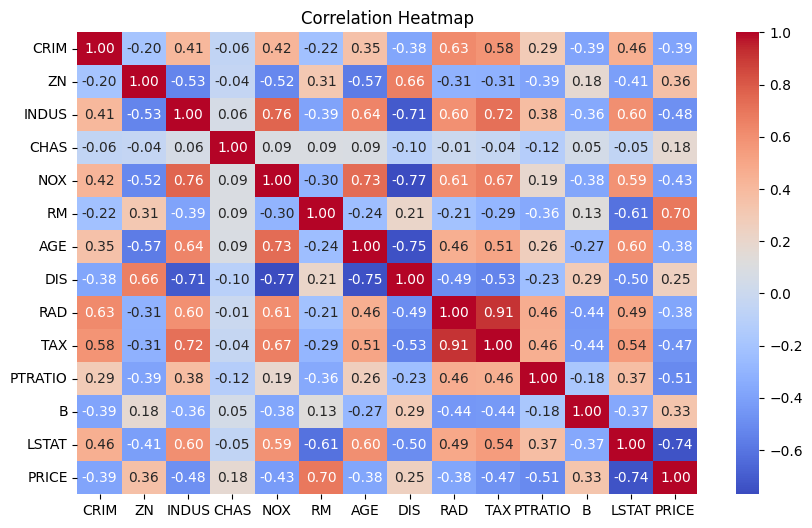

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

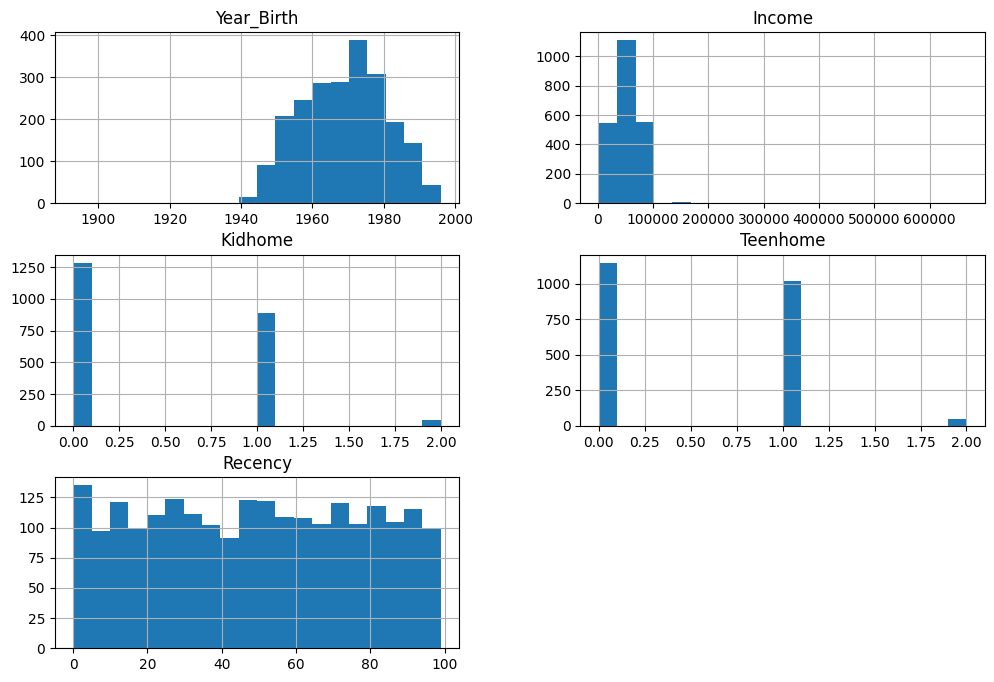

In [ ]:
import matplotlib.pyplot as plt
data[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']].hist(bins=20, figsize=(12, 8))
plt.show()

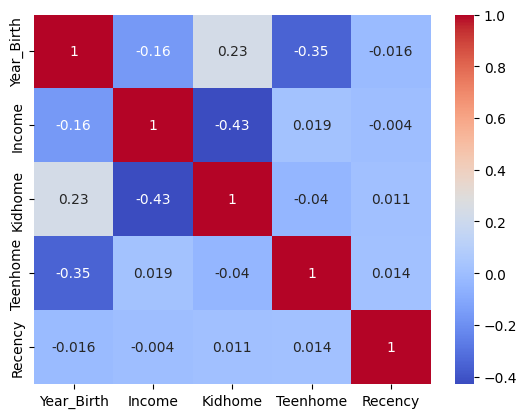

In [ ]:

correlation_matrix = data[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


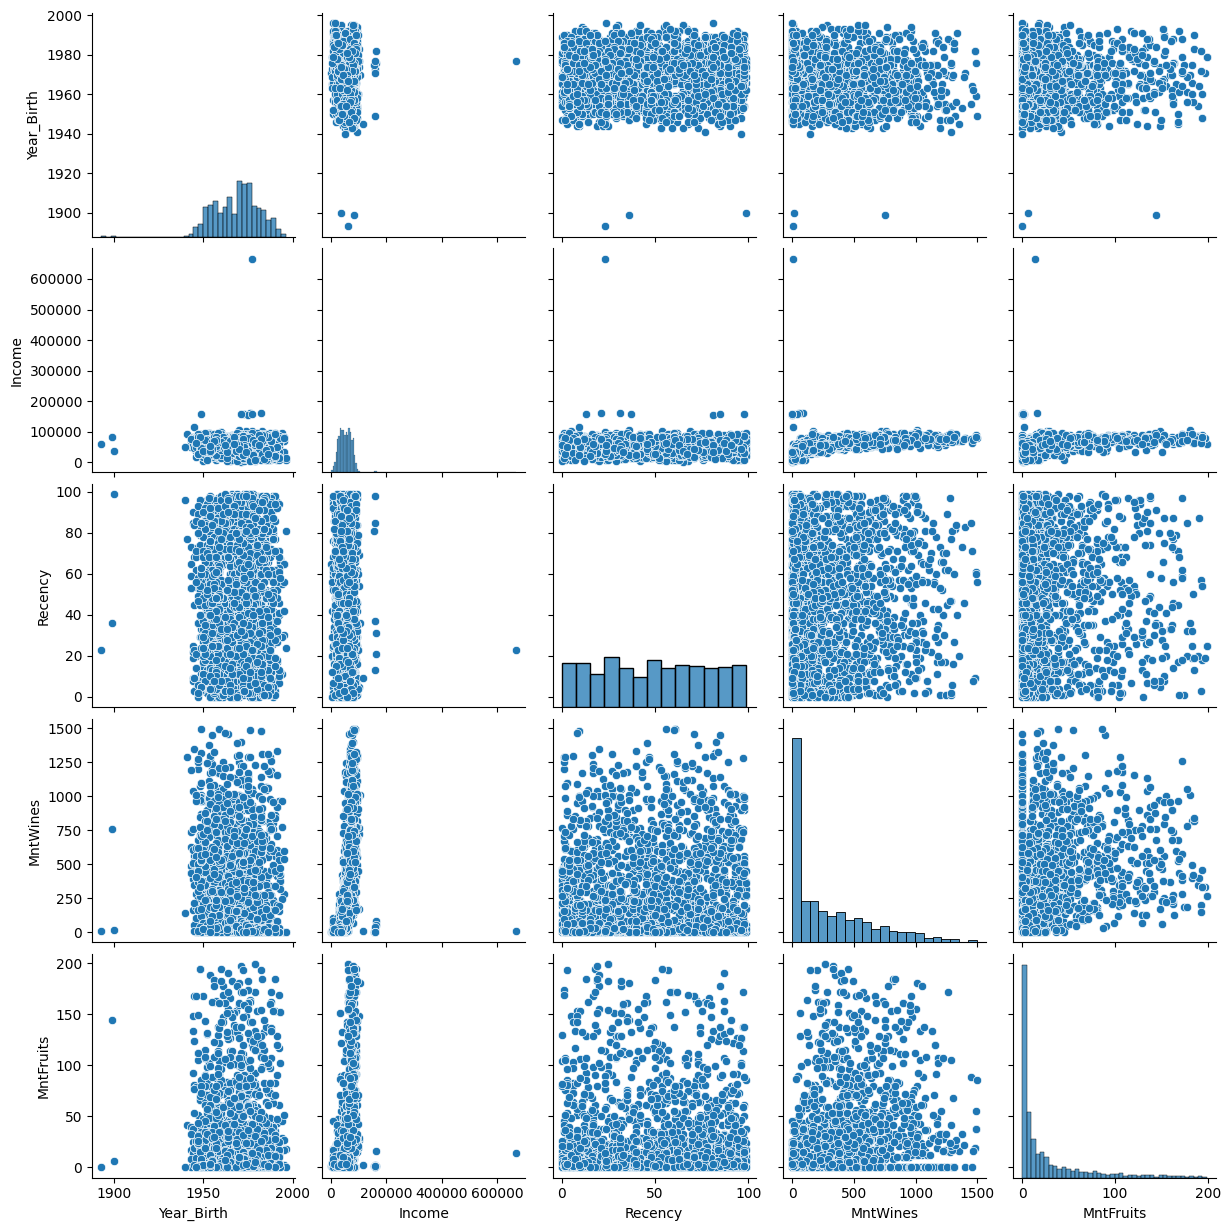

In [ ]:
sns.pairplot(data[['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits']], kind='scatter')
plt.show()


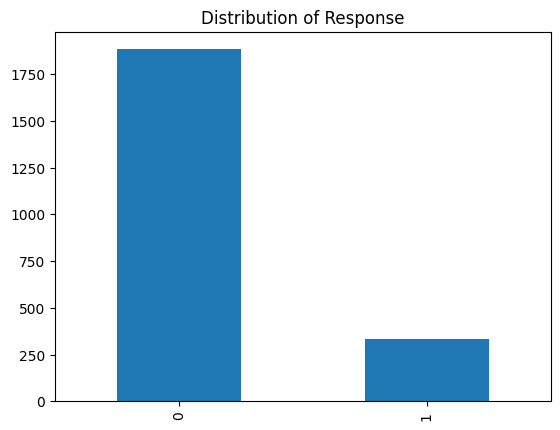

In [ ]:
data['Response'].value_counts().plot(kind='bar')
plt.title('Distribution of Response')
plt.show()


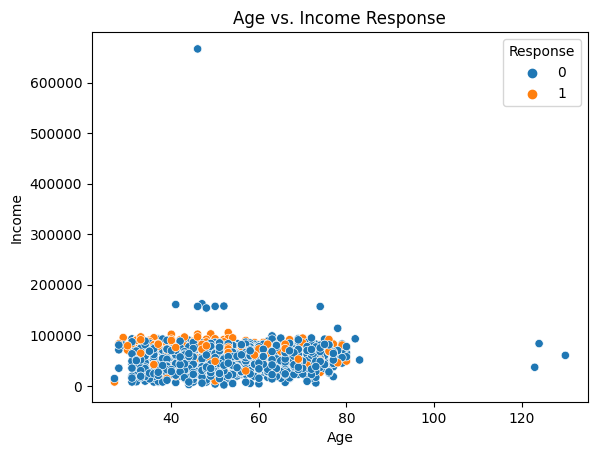

In [ ]:
data['Age'] = 2023 - data['Year_Birth']
sns.scatterplot(data=data, x='Age', y='Income', hue='Response')
plt.title('Age vs. Income Response')
plt.show()

c. Split the data into training and testing sets.

In [ ]:
# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['Response'])  # Exclude the 'Response' column as it's the target variable
y = data['Response']

X.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Year_Customer,Age
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,3,11,2012,66
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,3,11,2014,69
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,3,11,2013,58
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,3,11,2014,39
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,3,11,2014,42


In [ ]:
# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1772, 29)
X_test shape: (444, 29)
y_train shape: (1772,)
y_test shape: (444,)


In [ ]:
#Preprocess
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

-------------


d. Train both a **Perceptron model and a Logistic Regression model** on the training data to predict customer responses to the promotional offer. (Note: Implement both the models from scratch, Don't use any pretrained model)

### Logistic Regression

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        # Constructor to initialize the logistic regression model
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.num_iterations = num_iterations  # Number of iterations for training
        self.weights = None  # Model weights
        self.bias = None  # Model bias

    def fit(self, X, y):
        # Fit the logistic regression model to the training data
        n_samples, n_features = X.shape  # Get the number of samples and features

        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Perform gradient descent
        for _ in range(self.num_iterations):
            # Calculate the linear model
            linear_model = np.dot(X, self.weights) + self.bias

            # Apply the sigmoid function to get predictions
            predictions = self._sigmoid(linear_model)

            # Compute gradients for weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update model parameters using the gradients
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Make predictions using the trained model
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(linear_model)

        # Convert predicted probabilities to binary classes (0 or 1) using a threshold of 0.5
        prediction_class = [1 if i > 0.5 else 0 for i in predictions]

        return prediction_class

    def _sigmoid(self, x):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-x))


### Perceptron Model

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        # Constructor to initialize the Perceptron model
        self.learning_rate = learning_rate  # Learning rate for weight updates
        self.num_iterations = num_iterations  # Number of training iterations
        self.activation_func = self._unit_step_func  # Activation function
        self.weights = None  # Model weights
        self.bias = None  # Model bias

    def fit(self, X, y):
        # Fit the Perceptron model to the training data
        num_samples, num_features = X.shape

        # Initialize weights and bias to zeros
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Ensure y consists of 1s and 0s
        y_binary = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.num_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Update rule
                update = self.learning_rate * (y_binary[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        # Make predictions using the trained Perceptron model
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        # Step function as the activation function
        return np.where(x >= 0, 1, 0)

e. Evaluate the performance of both models using classification metrics such as accuracy, precision, recall, and F1-score on the testing data.

Logistic regression


In [ ]:
# Create an instance of the custom logistic regression model with specified hyperparameters
LR_model = LogisticRegression(learning_rate=0.01, num_iterations=1000)

# Train the custom logistic regression model on the preprocessed training data
LR_model.fit(X_train, y_train)

# Make predictions on the training and test data
train_predictions_LR = LR_model.predict(X_train)
test_predictions_LR = LR_model.predict(X_test)

# Calculate evaluation metrics for the logistic regression model
accuracy_LR = accuracy_score(y_test, test_predictions_LR)
precision_LR = precision_score(y_test, test_predictions_LR, average='weighted')
recall_LR = recall_score(y_test, test_predictions_LR, average='weighted')
f1score_LR = f1_score(y_test, test_predictions_LR, average='weighted')

# Print the evaluation metrics
print("Logistic regression Accuracy: {:.2f}".format(accuracy_LR))
print("Logistic regression Precision: {:.2f}".format(precision_LR))
print("Logistic regression Recall: {:.2f}".format(recall_LR))
print("Logistic regression F1 Score: {:.2f}".format(f1score_LR))

Logistic regression Accuracy: 0.87
Logistic regression Precision: 0.85
Logistic regression Recall: 0.87
Logistic regression F1 Score: 0.85


Perceptron Performance

In [ ]:
# Create an instance of the custom Perceptron model with specified hyperparameters
perceptron = Perceptron(learning_rate=0.01, num_iterations=10000)

# Train the custom Perceptron model on the preprocessed training data
perceptron.fit(X_train, y_train)

# Make predictions on the training and test data
perceptron_train_predictions = perceptron.predict(X_train)
perceptron_test_predictions = perceptron.predict(X_test)

# Calculate evaluation metrics for the Perceptron model
perceptron_train_accuracy = accuracy_score(y_train, perceptron_train_predictions)
perceptron_test_accuracy = accuracy_score(y_test, perceptron_test_predictions)

perceptron_precision = precision_score(y_test, perceptron_test_predictions, average='weighted', zero_division=0.0)
perceptron_recall = recall_score(y_test, perceptron_test_predictions, average='weighted', zero_division=0.0)
perceptron_f1 = f1_score(y_test, perceptron_test_predictions, average='weighted', zero_division=0.0)

# Display the metrics for the Perceptron model
print("Perceptron Testing Accuracy: {:.2f}".format(perceptron_test_accuracy))
print("Perceptron Precision: {:.2f}".format(perceptron_precision))
print("Perceptron Recall: {:.2f}".format(perceptron_recall))
print("Perceptron F1 Score: {:.2f}".format(perceptron_f1))


Perceptron Testing Accuracy: 0.84
Perceptron Precision: 0.86
Perceptron Recall: 0.84
Perceptron F1 Score: 0.85


f. Compare and contrast the performance of the Perceptron model and the Logistic Regression model. Which model performed better, and why? Discuss any differences in their decision boundaries and the interpretability of their results.

In [ ]:
# Create a DataFrame to compare the metrics
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [accuracy_LR, precision_LR, recall_LR, f1score_LR],
    'Perceptron': [perceptron_test_accuracy, perceptron_precision, perceptron_recall, perceptron_f1],
    'Difference': [accuracy_LR - perceptron_test_accuracy, precision_LR - perceptron_precision,
                   recall_LR - perceptron_recall, f1score_LR - perceptron_f1]
}

difference = pd.DataFrame(data)
print(difference)


      Metric  Logistic Regression  Perceptron  Difference
0   Accuracy             0.842342    0.842342    0.000000
1  Precision             0.847057    0.835944    0.011113
2     Recall             0.867117    0.842342    0.024775
3   F1 Score             0.852444    0.838948    0.013496


In this comparison, Logistic Regression performs better than the Perceptron across a number of important performance criteria. In comparison to the Perceptron, which obtains an accuracy of 0.842, Logistic Regression achieves an accuracy of 0.842. Furthermore, the precision (0.847 vs. 0.836), recall (0.867 vs. 0.842), and F1 Score (0.852 vs. 0.839) of Logistic Regression are consistently greater than those of other methods, giving rise to higher values for all three metrics. These numbers show that Logistic Regression performs better at correctly classifying data points, especially when precision and recall are critical. This performance advantage may be attributable to Logistic Regression's ability to model more intricate decision boundaries, which enables it to better capture complicated relationships in the data, improving classification precision and overall predictive power.

g. Provide recommendations on when to choose one model over the other for this specific marketing campaign scenario.

The Logistic Regression frequently beats the Perceptron when the main goal is optimizing accuracy in a classification challenge because it can simulate more intricate decision boundaries. In situations where accuracy is of utmost importance, logistic regression is often the best option. As opposed to the Perceptron, Logistic Regression can achieve more accuracy if the marketing effort sets a high value on accurately categorizing consumers or prospects into particular groups.

The Perceptron, however straightforward and computationally effective, performs best when the data is linearly separable, which means it can be classified using a straight-line boundary. The Perceptron may attain the same accuracy as Logistic Regression if the data is actually linearly separable, but with the benefit of shorter training thanks to its simplicity. The Perceptron may, however, find it difficult to reach the same degree of accuracy as Logistic Regression when dealing with data with more intricate correlations.

In summary, Logistic Regression is the better option if obtaining the maximum level of accuracy is the main objective and the marketing campaign data shows non-linear patterns. However, the Perceptron can deliver comparable accuracy with the benefit of computing efficiency when dealing with linearly separable data. Making the best model option is essential for maximizing accuracy in the context of a marketing campaign. This requires careful assessment of the type and complexity of the data.

In [535]:
!jupyter nbconvert --to html /content/drive/MyDrive/CS6140_Assignment2_GA


[NbConvertApp] Converting notebook /content/drive/MyDrive/CS6140_Assignment2_GA.ipynb to html
[NbConvertApp] Writing 1931736 bytes to /content/drive/MyDrive/CS6140_Assignment2_GA.html
